In [16]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import matplotlib as mpl
from scipy.stats import multivariate_normal
import scipy
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
import seaborn as sns
sns.set(style='whitegrid', palette='pastel', color_codes=True)
from scipy.integrate import quad
import sys
sys.path.insert(1,'./2016_GCP_POA_for_Vic_short-header/2016_GCP_POA_for_Vic_short-header/2016 Census GCP Postal Areas for VIC')
#import pymc3_graphs as bayes_params
#2016_GCP_POA_for_Vic_short-header/2016 Census GCP Postal Areas for VIC')
sys.path.insert
#sns.mpl.rc('figure', figsize=(10,6))
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [17]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def region(df):
    #ax = plt.axes()
    
    coord_tot=df['coords']
    #print(coord_tot)
    #ax.set_aspect('equal')
    for coords in coord_tot:
        #print(coords)
        #coords=k[0]
        #print(coords)
        y_lon=np.zeros(len(coords))
        x_lat=np.zeros(len(coords))
        for count,i in enumerate(coords):
            #print(i)
            #print(count)
            x_lat[count]=i[0]  #lat
            y_lon[count]=i[1]
            #plt.figure()
    x0 = np.mean([np.min(x_lat),np.max(x_lat)])
    y0 = np.mean([np.min(y_lon),np.max(y_lon)])
        
    return x_lat,y_lon,x0,y0#plt.plot(x_lat,y_lon)

In [18]:
shp_path = 'VIC_LOCALITY_POLYGON_SHP.shp'
sf = shp.Reader(shp_path)



df = read_shapefile(sf)
df.drop_duplicates('NAME',inplace=True)
print(df.shape)

(2957, 11)


In [19]:
#print(df)
#print(df)
#print(df['POSTCODE'])
#print(df['NAME'])

#df['NAME'] = df['NAME'].replace({' Colac-Otway':' Colac Otway'})
#df= df[~df['NAME'].isin(['WANTIRNA'])]





In [20]:
postcode=pd.read_csv('australian_postcodes.csv')
print(postcode)

          id  postcode                        locality state        long  \
0        230       200                             ANU   ACT    0.000000   
1      21820       200  Australian National University   ACT  149.118900   
2        232       800                          DARWIN    NT  130.836680   
3        233       801                          DARWIN    NT  130.836680   
4        234       804                           PARAP    NT  130.873315   
...      ...       ...                             ...   ...         ...   
18270  11185      9010                        BRISBANE   QLD  152.823141   
18271  11186      9013                        BRISBANE   QLD  152.823141   
18272  11187      9015                        BRISBANE   QLD  152.823141   
18273  11196      9464                    NORTHGATE MC   QLD  153.074982   
18274  11197      9726                   GOLD COAST MC   QLD  153.412197   

             lat                  dc type                   status      sa3  \
0       

In [21]:
vic_boolean = postcode['state'] == 'VIC'
vic_post_all=postcode[vic_boolean]

vic_post_boolean=vic_post_all['type']=='Delivery Area'

vic_post=vic_post_all[vic_post_boolean] #mapping from postcode to locality
print(vic_post)


        id  postcode            locality state        long        lat  \
6103  4746      3000           MELBOURNE   VIC  144.956776 -37.817403   
6105  4748      3002      EAST MELBOURNE   VIC  144.982207 -37.818517   
6106  4749      3003      WEST MELBOURNE   VIC  144.949592 -37.810871   
6107  4750      3004           MELBOURNE   VIC  144.970161 -37.844246   
6110  4752      3005  WORLD TRADE CENTRE   VIC  144.950858 -37.824608   
...    ...       ...                 ...   ...         ...        ...   
9612  8520      3995         WATTLE BANK   VIC  145.630713 -38.578071   
9613  8521      3995           WONTHAGGI   VIC  145.630713 -38.578071   
9614  8522      3995            WOOLAMAI   VIC  145.630713 -38.578071   
9615  8523      3996           INVERLOCH   VIC  145.745609 -38.629561   
9616  8524      3996         POUND CREEK   VIC  145.745609 -38.629561   

                        dc           type              status      sa3  \
6103  CITY DELIVERY CENTRE  Delivery Area  Update

In [22]:

print(df.shape)

columns_df=df.columns.to_numpy()
#print(columns_df)
#s1 = pd.merge(df, vic_post, how='inner', on=['NAME'])
#print(df)
#print(vic_post)
df3 = pd.merge(vic_post, df, how='inner', left_on='locality', right_on='NAME') #finding where the postal addresses and data localities agree (are the same)
#df does not have postcodes, but vic_post does, need to find for our df's which ones have a postcodes (df3 is that database)
df3=df3.drop(columns_df,axis=1)

df3=df3.drop_duplicates(subset=['locality']) #drop where localities overlap 
df3=df3.set_index('locality') 

data_g2=pd.read_csv('./2016_GCP_POA_for_Vic_short-header/2016 Census GCP Postal Areas for VIC/2016Census_G02_VIC_POA.csv') #the file we want to se

data_g2=data_g2.set_index('POA_CODE_2016') #easier for me to understand if indexed by postcode, technically dont have to do this
empt=np.zeros(len(data_g2.index), dtype=object)
for count,i in enumerate(data_g2.index):
    code_num=i.split('A')
    #print(code_num[1])
    empt[count]=code_num[1]

data_g2=data_g2.set_index(empt)

print(data_g2)

(2957, 11)
      Median_age_persons  Median_mortgage_repay_monthly  \
3000                  26                           1700   
3002                  38                           2192   
3003                  30                           2006   
3004                  35                           2000   
3005                  33                           2184   
...                  ...                            ...   
3990                  51                           1467   
3991                  50                           1355   
3992                  42                           1419   
3995                  48                           1300   
3996                  52                           1723   

      Median_tot_prsnl_inc_weekly  Median_rent_weekly  \
3000                          431                 451   
3002                         1341                 451   
3003                          852                 450   
3004                         1187                 47

In [23]:
print(df3) 
#print(df3.set_index('locality'))
#print(df3.dtype)
#print(data_g2.loc['3006'])
#print(pd.MultiIndex.from_frame(df3))
#list_index=list(df3.index)
#list_str=[str(int_) for int_ in list_index]
#print(list_str)
#index = pd.MultiIndex.from_frame(pd.DataFrame(list_str))
#print(pd.DataFrame(df3, index=index))
#indexs=pd.MultiIndex.from_arrays(list_str)
#print(indexs)
#dfcols = df3[df3.columns]

#multi_df=pd.Series(df3['locality'], index=indexs)
##print(indexs)
#print(pd.DataFrame(df3,index=indexs))

                   id  postcode state        long        lat  \
locality                                                       
MELBOURNE        4746      3000   VIC  144.956776 -37.817403   
EAST MELBOURNE   4748      3002   VIC  144.982207 -37.818517   
WEST MELBOURNE   4749      3003   VIC  144.949592 -37.810871   
SOUTH WHARF     20754      3006   VIC  144.952074 -37.825287   
SOUTHBANK        4753      3006   VIC  144.965926 -37.823258   
...               ...       ...   ...         ...        ...   
WATTLE BANK      8520      3995   VIC  145.630713 -38.578071   
WONTHAGGI        8521      3995   VIC  145.630713 -38.578071   
WOOLAMAI         8522      3995   VIC  145.630713 -38.578071   
INVERLOCH        8523      3996   VIC  145.745609 -38.629561   
POUND CREEK      8524      3996   VIC  145.745609 -38.629561   

                                  dc           type              status  \
locality                                                                  
MELBOURNE       C

In [24]:
def plot_localities(df,df3,data_plot,data_name,limits=False,limx=[144,146],limy=[-38.25,-37.5]): #df is coords for the map, df3 is the mapping of postcodes to localities and data_plot is the data that needs to be plotted
    #data is in the form index (postcodes) and data is a stat from census 2016

    fig, axs = plt.subplots()
    fig.set_size_inches(18.5, 10.5,forward=True)

    for index,row in df.iterrows(): #use all polygon shapes (df) df3 is all the postcode that has a corresponding data point (from data) and data_g2 is the data
        #print(index)
        name=row['NAME']
        coord=row['coords']
        #name_long=row['long']
        #name_lat=row['lat']
        y_lon=np.zeros(len(coord))
        x_lat=np.zeros(len(coord))
        for count2,coord in enumerate(coord):

            x_lat[count2]=coord[0]  #lat
            y_lon[count2]=coord[1]

        axs.plot(x_lat,y_lon,c='k',linewidth=0.5,alpha=0.5)
        axs.set_title('Map of victoria')
        if name in df3.index: #if there is a locality with name in df3
            #name_data=df3.loc[name]
            #name_lat=name_data['lat']
            #name_long=name_data['long']
            #axs.annotate(name,xy=(name_lat,name_long),fontsize=5)
            postcode=str(df3.loc[name]['postcode']) #find what postcode corresponds with that name
            if postcode in data_plot.index:
                cmap = mpl.cm.get_cmap('Purples')
                norm = mpl.colors.Normalize(vmin=np.min(data_plot), vmax=np.max(data_plot))  #scale of cmap
                rgba = cmap(norm(data_plot.loc[postcode]))#data point for cmap
                axs.fill(x_lat,y_lon, c=rgba[:-1])
                
                
            else:

                axs.fill(x_lat,y_lon, c='red') #dont have the data for the postcode  
                
            if limits==True:
                axs.set_ylim(limy )
                axs.set_xlim(limx )
                name_data=df3.loc[name]
                #print(name)
                #y0=name_data['lat'] #for some reason they have their long and lats mixed around
                #print(x0)
                y0=0.5*(np.min(y_lon)+np.max(y_lon))
                #x0=name_data['long']
                x0=0.5*(np.min(x_lat)+np.max(x_lat))
                #print(y0)
                if x0>limx[0] and x0<limx[1] and y0>limy[0] and y0<limy[1]:
                    axs.annotate(s=name,xy=[x0, y0], fontsize=2,ha='center', va='center',c='silver',weight='bold')
                    #print('in')
                        
    
    
    

        else:
            axs.fill(x_lat,y_lon, c='grey') #dont have the postcode of the locality
            #the white spots means where data =0
    #fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)
    #fig.set_ylabel('# of contacts', rotation=270)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs).ax.set_ylabel(data_name)
    fig.savefig('map_of_victoria',dpi=150)

Index(['Median_age_persons', 'Median_mortgage_repay_monthly',
       'Median_tot_prsnl_inc_weekly', 'Median_rent_weekly',
       'Median_tot_fam_inc_weekly', 'Average_num_psns_per_bedroom',
       'Median_tot_hhd_inc_weekly', 'Average_household_size'],
      dtype='object')
x Median_tot_prsnl_inc_weekly y Median_age_persons


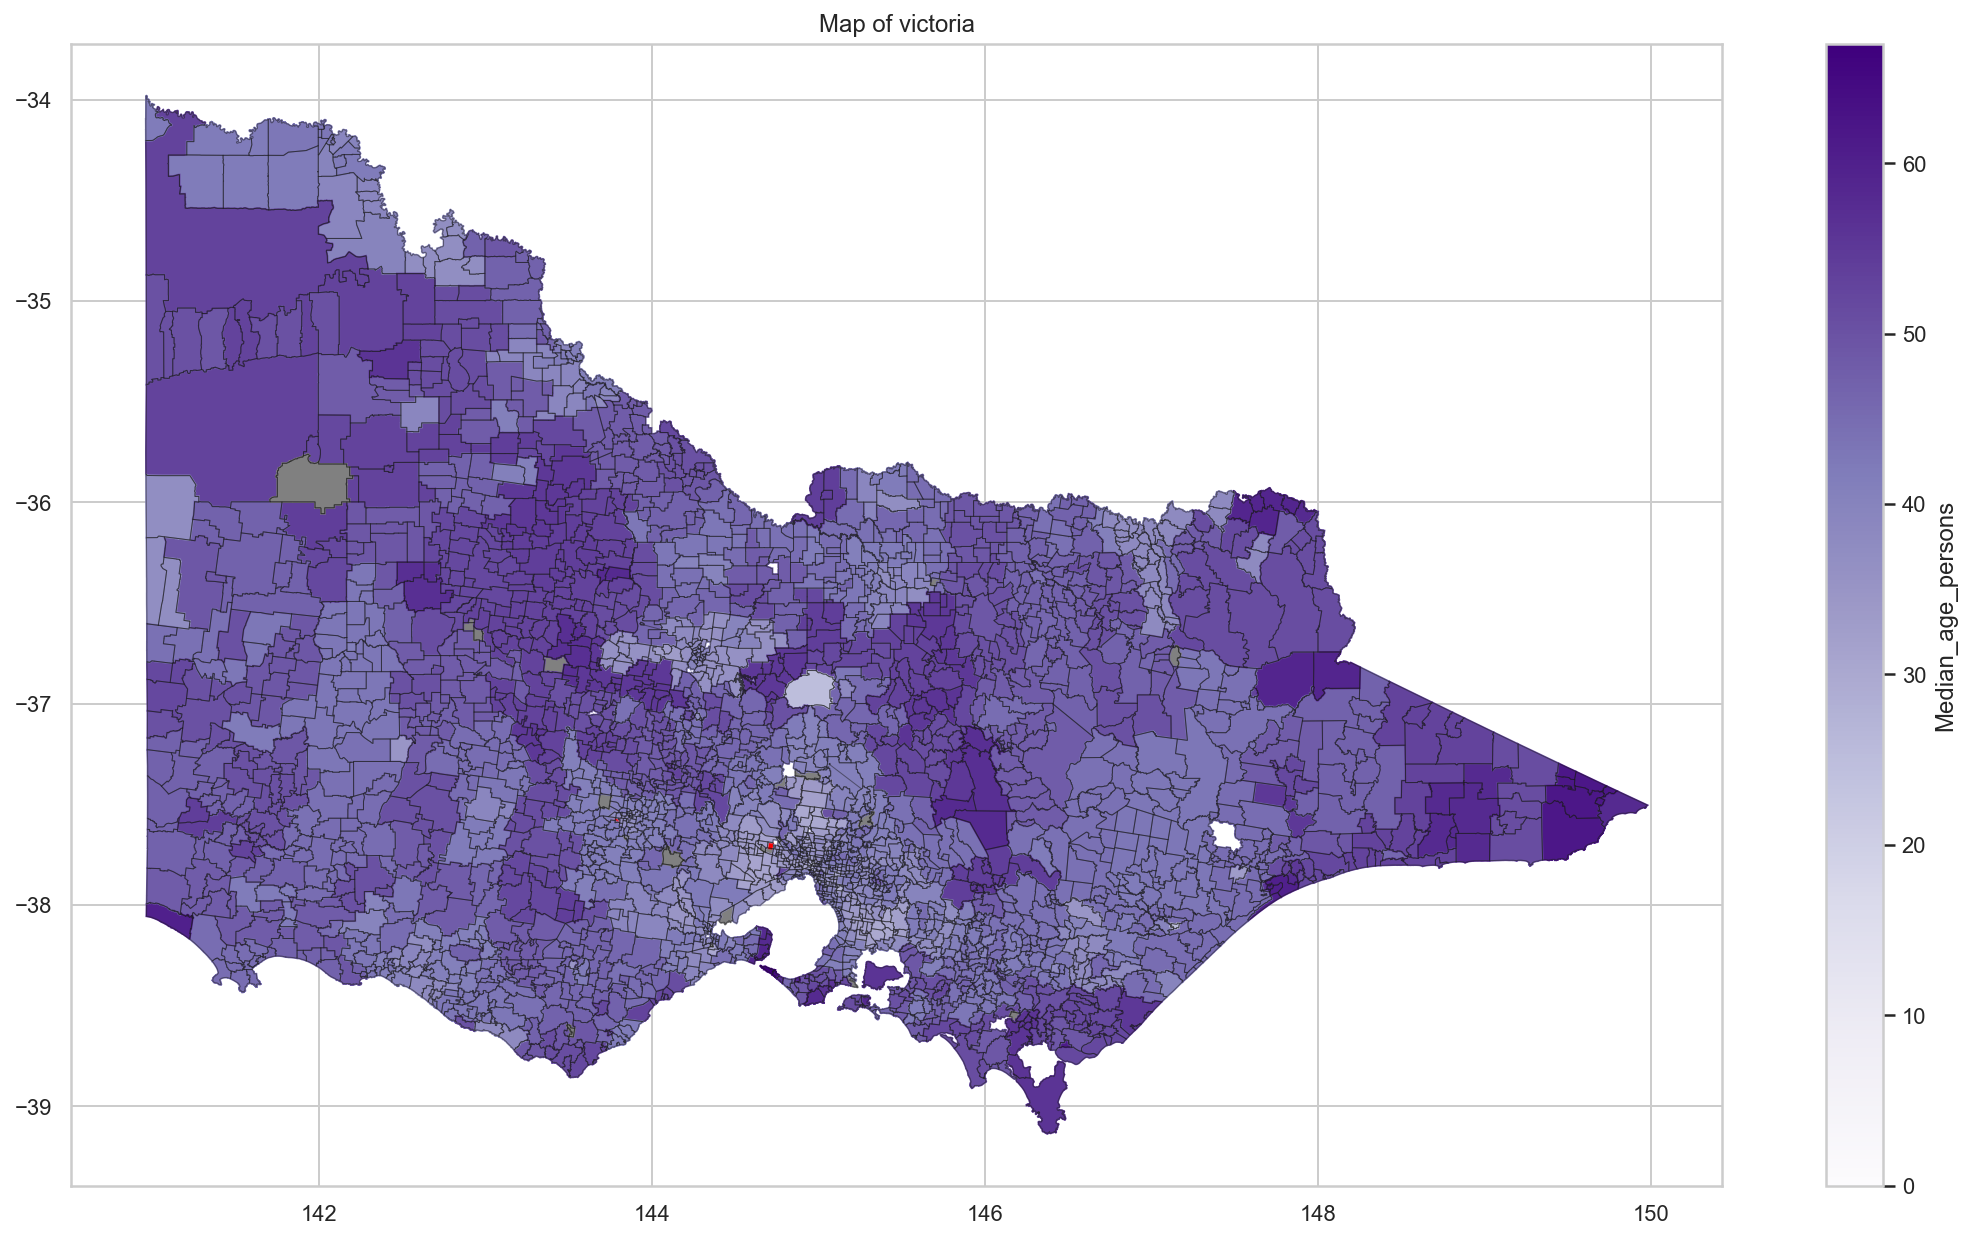

In [25]:
print(data_g2.columns)

x_name=data_g2.columns[2]
y_name=data_g2.columns[0]
print('x',x_name,'y',y_name)
data_plot=data_g2[y_name]
#print(data_plot)
plot_localities(df,df3,data_plot,y_name,limits=False)


xname Median_tot_prsnl_inc_weekly yname Median_age_persons
x  Median_tot_prsnl_inc_weekly
y  Median_age_persons


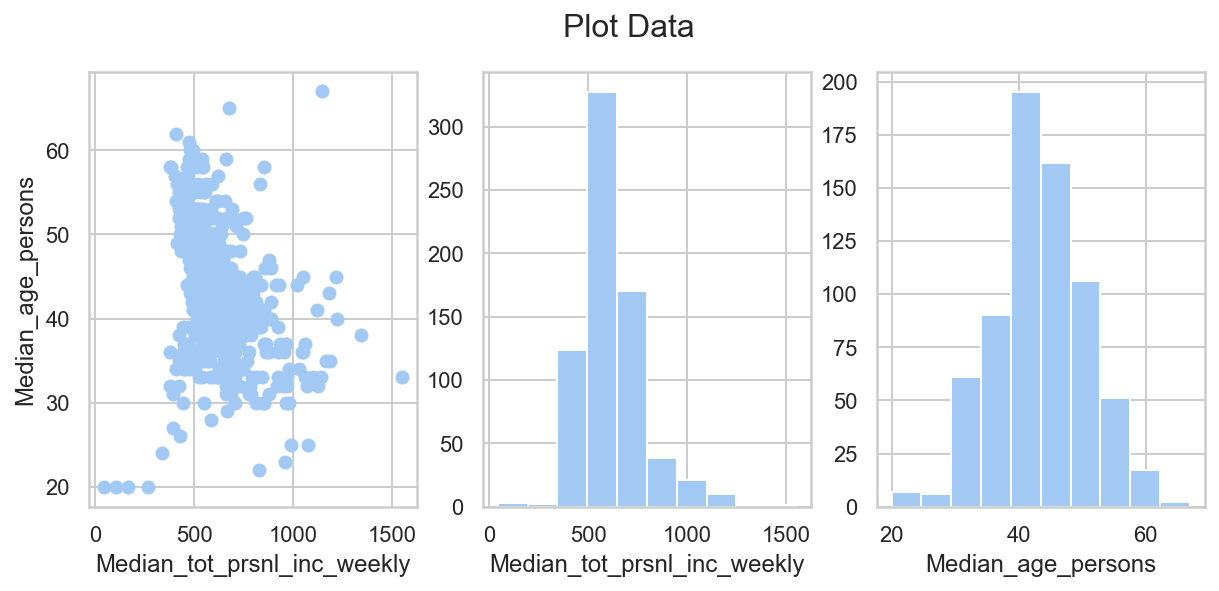

In [26]:
#age=data_g2[data2]
#income=data_g2[data1]
#x_name=data_g2.columns[2]
#y_name=data_g2.columns[0]

#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Horizontally stacked subplots')
#ax1.plot(x, y)
#ax2.plot(x, -y)


print('xname '+x_name,'yname '+y_name)
datas = data_g2[[y_name, x_name]].copy() #data frame with only data1name and data2name
a_series = (datas != 0).any(axis=1) #remove all zero's
datas = datas.loc[a_series]
xdata=datas[x_name]
ydata=datas[y_name]
print('x ',x_name)
print('y ',y_name)


fig, (ax1,ax2,ax3)=plt.subplots(1,3)
ax1.scatter(xdata,ydata)
ax1.set_xlabel(x_name)
ax1.set_ylabel(y_name)
#plt.
#plt.show()
ax2.hist(xdata)
ax2.set_xlabel(x_name)
#ax2.show()
ax3.hist(ydata)
ax3.set_xlabel(y_name)
fig.set_size_inches(10, 4,forward=True)
fig.suptitle('Plot Data', fontsize=16)
fig.savefig('plot_data',dpi=300)

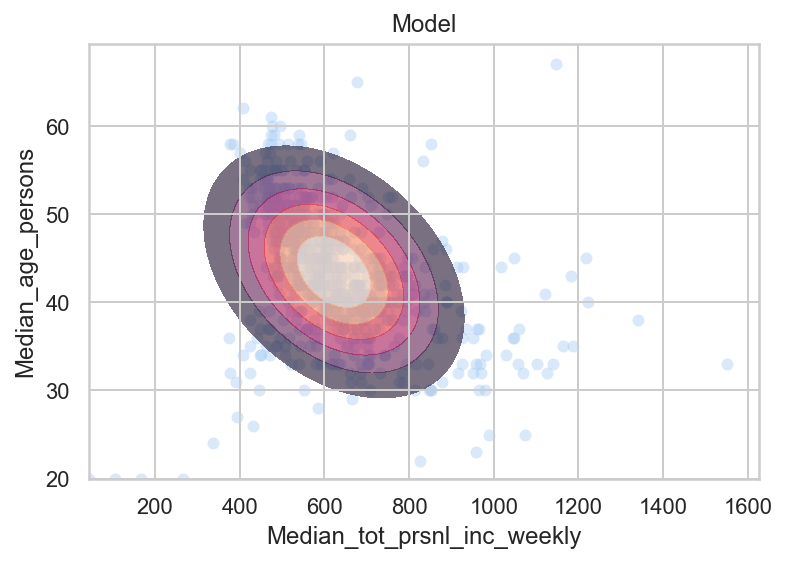

In [32]:

ybar1d=np.mean(datas,axis=0).values

ybar=ybar1d[np.newaxis]

yybar=np.dot(ybar.T,ybar)

left=(1/len(datas))*np.dot(datas.T,datas)


cov=left-yybar


size=100
x, y = np.mgrid[np.min(ydata):np.max(ydata):0.1, np.min(xdata):np.max(xdata):0.1]
pos = np.dstack((x, y))
rv = multivariate_normal(ybar1d, cov)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.scatter(xdata,ydata,alpha=0.4,lw = 0,zorder=-1)
levels=np.linspace(0,np.max(rv.pdf(pos)),8)
ax2.contourf(y, x, rv.pdf(pos),zorder=0,alpha=0.6,levels=levels[1:])

ax2.set_title('Model')
ax2.set_ylabel(y_name)
ax2.set_xlabel(x_name)
fig2.savefig('model',dpi=100)

#plt.show()

Left bound 30
Right bound 40


Probability of 30.0 <Median_age_persons< 40.0 given Median_tot_prsnl_inc_weekly= 900 is 0.47801347227437185


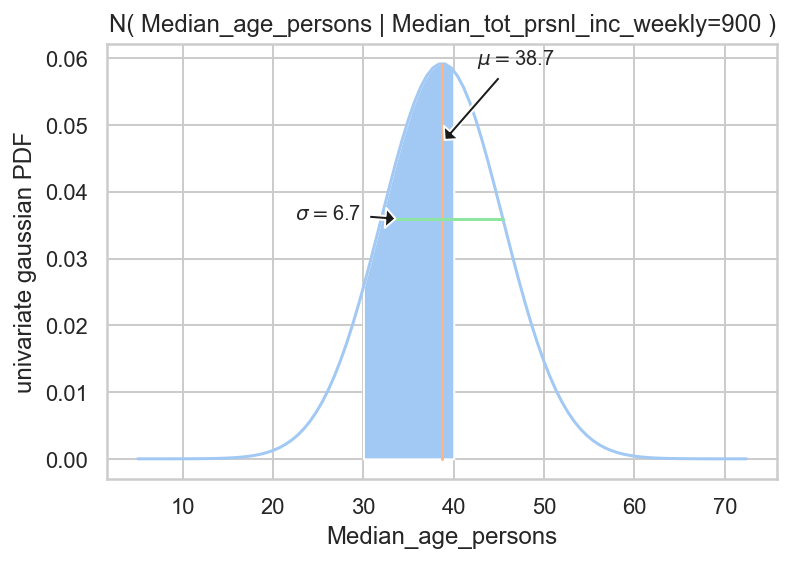

In [33]:
#given personal income=800 what is age
#age|income=800
#y1|y2=a 
def _gauss1d(x,sig,mu):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)**2/sig**2))

def conditional(a,ybar1d,cov,x_name,y_name,interval=False,dpi=200):
    
    

    mu_cond=ybar1d[0]+cov[0,1]*(cov[1,1]**(-1))*(a-ybar1d[1]) #find the mu conditioned on given 'a'

    cov_cond=cov[0,0]-cov[0,1]*(cov[1,1]**(-1))*cov[1,0]# find the covariance on given 'a'


    std=np.sqrt(cov_cond)



    x=np.linspace(-5*std+mu_cond,5*std+mu_cond,100)

    y=_gauss1d(x,std,mu_cond)
    fig, ax = plt.subplots()
    std_num=std*1
    ax.plot(x,y)
    ax.plot([mu_cond,mu_cond],[0,np.max(y)])
    ax.plot([mu_cond-std_num,mu_cond+std_num],np.repeat(_gauss1d(mu_cond+std_num,std,mu_cond),2))

    #print(mu_cond)
    ax.annotate('$\mu=$'+str(np.around(mu_cond,decimals=1)),xy=(mu_cond,np.max(y)*0.8), 
                xytext=(mu_cond*1.1,(np.max(y)/1)), arrowprops=dict(arrowstyle='simple,head_width=1',facecolor='k'))
    
    ax.annotate('$\sigma=$'+str(np.around(std_num,decimals=1)),xy=((mu_cond-std_num*0.7),_gauss1d(mu_cond+std_num,std,mu_cond)) ,
                xytext=((mu_cond-std_num)*0.7,_gauss1d(mu_cond+std_num,std_num,mu_cond)),arrowprops=dict(arrowstyle='simple,head_width=1',facecolor='k'))
    #ax.set_ylabel(y_name)
    ax.set_xlabel(y_name)
    ax.set_ylabel('univariate gaussian PDF')
    ax.set_title('N( '+y_name+' | '+ x_name+'='+str(a)+' )')
    if interval==True:
        p1=float(input('Left bound'))
        p2=float(input('Right bound'))
        xint=np.linspace(p1,p2,100)
        #print(_gauss1d(xint,std,mu_cond))
        ax.fill_between(xint, _gauss1d(xint,std,mu_cond))
        res, err=quad(_gauss1d,p1,p2,args=(std,mu_cond,))
        print('Probability of '+str(p1)+' <'+y_name+'< '+str(p2)+' given '+x_name+'= '+str(a)+' is '+str(res))
    
    if interval==True:
        fig.savefig('conditional_interval',dpi=dpi)
    else:
        fig.savefig('conditional',dpi=dpi)
    return mu_cond,cov_cond


a=900
a,b=conditional(a,ybar1d,cov,x_name,y_name,interval=False,dpi=100)
#this graph is tell us P(p1<age<p2|income=a)
#print(res)